In [1]:
import pandas as pd
data = pd.read_excel("https://confrecordings.ams3.digitaloceanspaces.com/countries.xlsx")
print(data.head())
print(data.shape)
print(data.isnull().sum())
data.dropna(inplace=True)
print(data.isnull().sum())

  country   latitude  longitude                  name
0      AD  42.546245   1.601554               Andorra
1      AE  23.424076  53.847818  United Arab Emirates
2      AF  33.939110  67.709953           Afghanistan
3      AG  17.060816 -61.796428   Antigua and Barbuda
4      AI  18.220554 -63.068615              Anguilla
(245, 4)
country      1
latitude     1
longitude    1
name         0
dtype: int64
country      0
latitude     0
longitude    0
name         0
dtype: int64


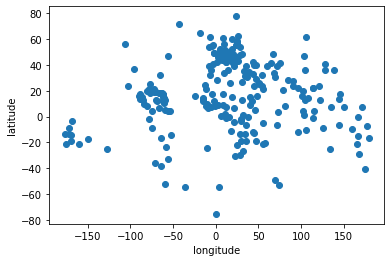

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data['longitude'],data['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [3]:
from sklearn.cluster import KMeans
xfeatures = data[['longitude','latitude']]
km = KMeans(n_clusters=7)
clusters = km.fit_predict(xfeatures)
print(km.labels_)
print(km.cluster_centers_)
data['cluster_continents'] = clusters
print(data.head())


[0 4 4 1 1 0 4 1 6 6 1 3 0 5 1 4 0 1 2 0 0 0 4 6 0 1 2 1 1 1 2 6 6 0 1 1 2
 6 6 6 0 0 3 1 6 2 1 1 1 0 2 4 0 0 4 0 1 1 0 1 0 4 0 4 0 4 0 5 1 5 0 0 6 0
 1 4 1 0 0 0 0 0 0 1 6 0 1 1 5 0 1 4 2 6 1 0 1 0 2 0 4 0 2 4 4 4 0 0 0 1 4
 2 6 4 2 3 6 1 2 2 4 1 4 2 4 1 0 2 0 6 0 0 0 0 0 0 0 0 6 5 0 0 2 2 2 5 1 0
 1 0 6 4 6 1 2 6 5 0 5 0 1 0 0 2 5 3 5 4 1 1 3 5 2 4 0 1 3 1 4 0 2 1 4 6 0
 0 2 6 4 5 6 4 0 2 6 0 0 0 0 0 0 4 1 6 1 4 6 1 0 6 0 2 4 3 2 4 0 3 4 1 5 2
 6 0 6 1 1 4 0 1 1 1 1 2 5 3 3 0 4 6 6 6 6]
[[   6.62042425   39.42260168]
 [ -69.68218541    8.58624816]
 [ 107.56984825   18.41199879]
 [-164.167216    -15.7990057 ]
 [  49.12901117   27.75506251]
 [ 160.65812286   -9.02398914]
 [  29.90412153  -16.55217197]]
  country   latitude  longitude                  name  cluster_continents
0      AD  42.546245   1.601554               Andorra                   0
1      AE  23.424076  53.847818  United Arab Emirates                   4
2      AF  33.939110  67.709953           Afghanistan             

In [4]:
print(data[data['cluster_continents']==0])
print(data[data['cluster_continents']==1])
print(data[data['cluster_continents']==2])
print(data[data['cluster_continents']==3])
print(data[data['cluster_continents']==4])
print(data[data['cluster_continents']==5])
print(data[data['cluster_continents']==6])

    country   latitude  longitude                    name  cluster_continents
0        AD  42.546245   1.601554                 Andorra                   0
5        AL  41.153332  20.168331                 Albania                   0
12       AT  47.516231  14.550072                 Austria                   0
16       BA  43.915886  17.679076  Bosnia and Herzegovina                   0
19       BE  50.503887   4.469936                 Belgium                   0
..      ...        ...        ...                     ...                 ...
211      TG   8.619543   0.824782                    Togo                   0
217      TN  33.886917   9.537499                 Tunisia                   0
224      UA  48.379433  31.165580                 Ukraine                   0
230      VA  41.902916  12.453389            Vatican City                   0
239      XK  42.602636  20.902977                  Kosovo                   0

[73 rows x 5 columns]
    country   latitude   longitude  \
3  

In [5]:
print(data.groupby('cluster_continents')['name'].count())

cluster_continents
0    73
1    51
2    28
3    10
4    35
5    14
6    32
Name: name, dtype: int64


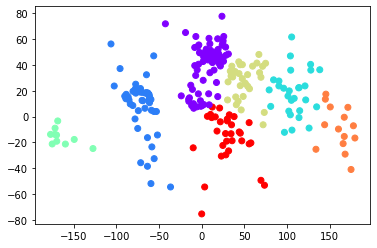

In [6]:
plt.scatter(data['longitude'],data['latitude'],c=data['cluster_continents'],cmap='rainbow')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
xfeatures = data[['longitude','latitude']]
hierarchical = AgglomerativeClustering(n_clusters=7)  
clusters = hierarchical.fit_predict(xfeatures)
data['cluster_continents'] = clusters
print(data.head())

  country   latitude  longitude                  name  cluster_continents
0      AD  42.546245   1.601554               Andorra                   4
1      AE  23.424076  53.847818  United Arab Emirates                   2
2      AF  33.939110  67.709953           Afghanistan                   2
3      AG  17.060816 -61.796428   Antigua and Barbuda                   5
4      AI  18.220554 -63.068615              Anguilla                   5


In [8]:
print(data[data['cluster_continents']==0])
print(data[data['cluster_continents']==1])
print(data[data['cluster_continents']==2])
print(data[data['cluster_continents']==3])
print(data[data['cluster_continents']==4])
print(data[data['cluster_continents']==5])
print(data[data['cluster_continents']==6])

    country   latitude   longitude                      name  \
13       AU -25.274398  133.775136                 Australia   
26       BN   4.535277  114.727669                    Brunei   
36       CC -12.164165   96.870956   Cocos [Keeling] Islands   
45       CN  35.861660  104.195397                     China   
50       CX -10.447525  105.690449          Christmas Island   
67       FJ -16.578193  179.414413                      Fiji   
69       FM   7.425554  150.550812                Micronesia   
88       GU  13.444304  144.793731                      Guam   
92       HK  22.396428  114.109497                 Hong Kong   
98       ID  -0.789275  113.921327                 Indonesia   
111      JP  36.204824  138.252924                     Japan   
114      KH  12.565679  104.990963                  Cambodia   
118      KP  40.339852  127.510093               North Korea   
119      KR  35.907757  127.766922               South Korea   
123      LA  19.856270  102.495496      

In [9]:
print(data.groupby('cluster_continents')['name'].count())

cluster_continents
0    36
1    49
2    40
3    10
4    54
5    47
6     7
Name: name, dtype: int64


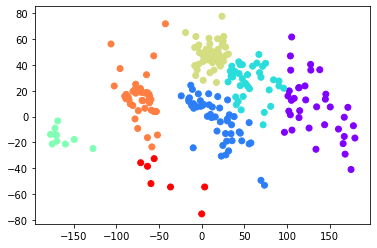

In [10]:
plt.scatter(data['longitude'],data['latitude'],c=data['cluster_continents'],cmap='rainbow')
plt.show()

In [11]:
'''from sklearn.cluster import DBSCAN
xfeatures = data[['longitude','latitude']]
db = DBSCAN(eps=0.4, min_samples=20)
clusters =  db.fit_predict(xfeatures)
data['cluster_continents'] = clusters
print(data.head())'''

"from sklearn.cluster import DBSCAN\nxfeatures = data[['longitude','latitude']]\ndb = DBSCAN(eps=0.4, min_samples=20)\nclusters =  db.fit_predict(xfeatures)\ndata['cluster_continents'] = clusters\nprint(data.head())"

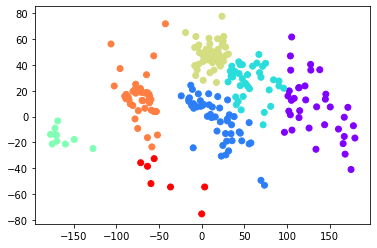

In [12]:
plt.scatter(data['longitude'],data['latitude'],c=data['cluster_continents'],cmap='rainbow')
plt.show()

In [15]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Us

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\DELL\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-vu5o_8ew\\fiona_0b269171c4564409a65fa470e46a520b\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-vu5o_8ew\\fiona_0b269171c4564409a65fa470e46a520b\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\DELL\AppData\Local\Temp\pip-pip-egg-info-926y8t0f'
         cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-vu5o_8ew\fiona_0b269171c4564409a65fa470e46a520b\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERROR: Co

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Us

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\DELL\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-gth14jcz\\fiona_aa2a95b4f0d442ccbf2da5311ac2d645\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-gth14jcz\\fiona_aa2a95b4f0d442ccbf2da5311ac2d645\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\DELL\AppData\Local\Temp\pip-pip-egg-info-7wmtvz86'
         cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-gth14jcz\fiona_aa2a95b4f0d442ccbf2da5311ac2d645\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERROR: Co


  Running setup.py clean for fiona
Failed to build fiona
    Running setup.py install for fiona: started
    Running setup.py install for fiona: finished with status 'error'


         cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-gth14jcz\fiona_214de477b4664590a16d45872a4fbbcc\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\DELL\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-gth14jcz\\fiona_4fe9f6018caf4f13a894141cc4cdd951\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-gth14jcz\\fiona_4fe9f6018caf4f13a894141cc4cdd951\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\DELL\AppData\Local\Temp\pip-pip-egg-info-fixone0g'
         cwd:

In [16]:
import geopandas as gpd


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))

ModuleNotFoundError: No module named 'geopandas'

In [17]:
g01 = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['longitude'],data['latitude']))
g01

NameError: name 'gpd' is not defined

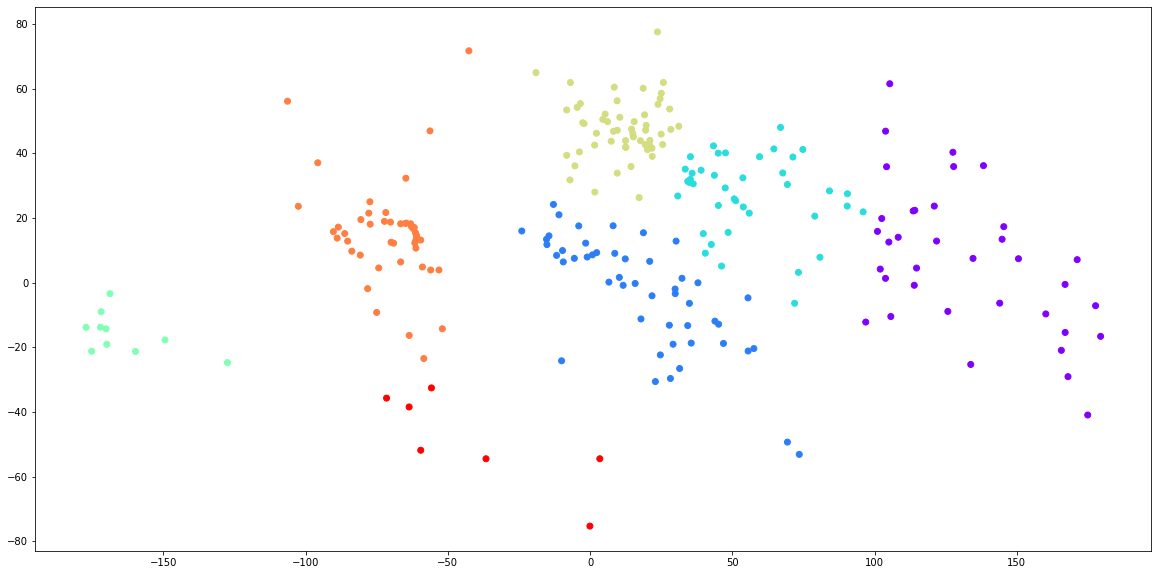

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(data['longitude'],data['latitude'],c=data['cluster_continents'],cmap='rainbow')
plt.show()

NameError: name 'world' is not defined

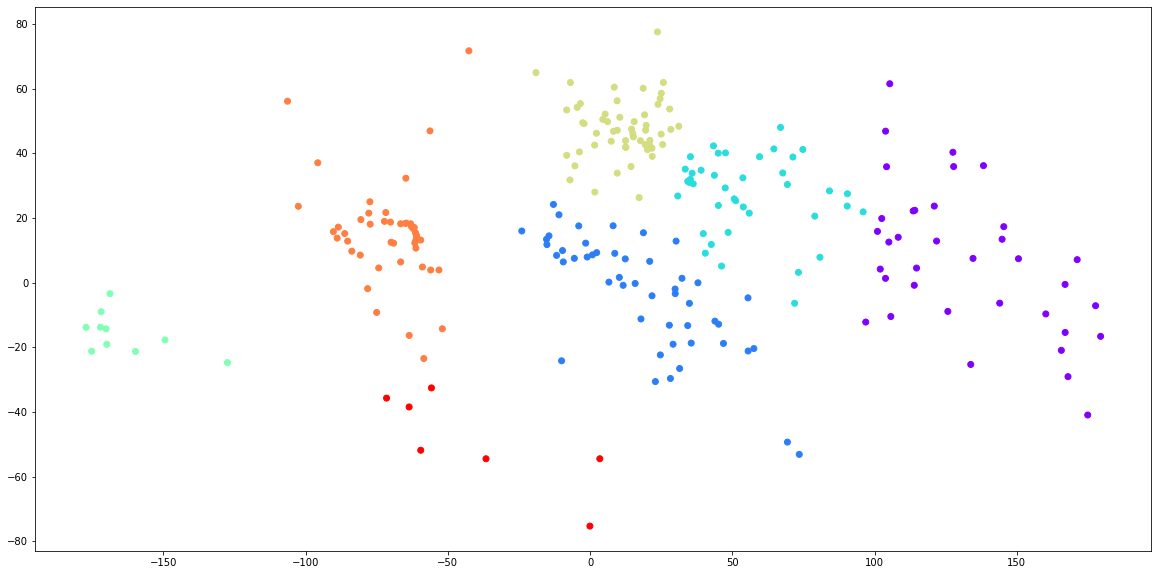

In [19]:
fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(data['longitude'],data['latitude'],c=data['cluster_continents'],cmap='rainbow')
world.geometry.boundary.plot(ax=ax)
plt.show()